In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h3><font color='blue'>=================================================</font></h3>
<font color='olive'>
<h1>What is machine learnng</h1><br>
<font color='darkgreen'>
<ul>
<li>Very simply - learning from existing, past data to predict outcomes – continuous or discrete, to group – for new, future data</li><br>
<li>Tom Mitchell(1998) – A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E</li><br>
<li>Two main categories of machine learning – supervised and unsupervised learning.</li><br>
<ul>
<li>Supervised learning – dependent/result variable is present in the data – given volume of trades,  delivery ratios, futures and options open interest positions, put call ratios, 50 day moving average differential, predict the closing price<br><br>
<li>
Given the pattern of last x days predict whether the closing price will be higher or lower or same – one of three discrete values – this is an example of a supervised learning classification problem</li><br><br>
<li>Unsupervised learning – the outcome/result variable is not in the data – for a marketing campaign classify audiences into different groups basis their attributes and purchasing patterns</li><br>
</ul>
</ul>
</font>
<h3><font color='blue'>=================================================</font></h3>

<h3><font color='blue'>=================================================</font></h3>
<font color='olive'>
<h1>How does machine learning work</h1>
<font color='darkgreen'>

<h3>How do we structure and what terminology do we use</h3>
<ul>
<li>We represent attributes of the data as features - its useful to think in terms of n features - we could say they are akin to columns in a reactangular matrix structure</li><br>
<li>We consider each row to be an example - we will consider our example space to be made up of m examples. We could imagine them as rows. So we have m examples, n features</li><br>
<li>We represent an example as $x_1^{(0)}\;x_2^{(0)}\;x_3^{(0)} \dots \; x_n^{(0)}\;$ This would be a first row in a zero based system. The subscript represents the feature. And the superscirpt in the parentheses the example number</li><br>
<li>The $m^{th}$ example would be represented as $x_1^{(m)}\;x_2^{(m)}\;x_3^{(m)} \dots \; x_n^{(m)}\;$</li><br>
<li>Each of these features represents individual variables and the labels denoted as y are a column of length - we can think of it as the result, dependent variable, a vector of length m - $\begin{bmatrix}y^{(0)} \newline y^{(1)} \newline \vdots \newline y^{(m)} \end{bmatrix}$</li><br>
<li>In regression we will be adding a column of ones as the first column to represent the y intercept</li><br>
</ul>
</font>
<h3><font color='blue'>=================================================</font></h3>

<h3><font color='blue'>=================================================</font></h3>
<font color='olive'>
<h1>How does machine learning work</h1>

<font color='darkgreen'>
<h3>There are two approaches for linear regression:</h3><br>
<ul>
<b><u>Gradient descent:</u></b><br><br>
<li>Initialize the parameters to be learned to a small value</li><br>
<li>Differentiate the cost function and adjust it applying a small learning rate</li><br>
<li>Stop when the cost reduction on successive iterations becomes smaller than a very small quantity</li><br>
<b><u>Normal equation – for linear regression</u></b><br><br>
<li>Applying matrix notation – equate the derivative of the cost function to zero</li><br>
<li>We will get the parameters to be equal to:</li><br>
$ ( X^T   X )^{-1} * X^ Ty$
</ul>
</font>

</font>
<h3><font color='blue'>=================================================</font></h3>

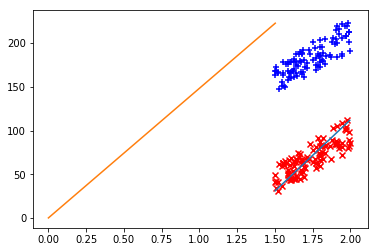

In [2]:
# Why do we need the intercept
np.random.seed(100)
# Lets model the height weight relationship for middle school
# children where ideal weight 
# is equal to -114.3 + 106.5 * height in metres
x = np.random.uniform(1.5,2,100)
# print(x)
# Here -114.3 is the point where the best fit line will meet the x axis
# It is not the weight for height = 0. It is meaningless to make regression predictins
# outside your data range
y = -114.3 + np.random.uniform(95,115,100) * x
# print(y)
# Lets check the scatter plot for x and y
plt.scatter(x,y,color='r',marker='x')
# Lets fit a line to our data by plotting the min and max points
x1 = np.array([np.min(x),np.max(x)])
y1 = np.array([np.min(y),np.max(y)])
plt.plot(x1,y1)
# Now lets do away with the intercept value of -114.3
y2 = np.random.uniform(95,115,100) * x
# Create the array for the new series without the intercept
y3 = np.array([np.min(y2),np.max(y2)])
# Lets run a line through the first and last points with the new series
plt.plot(np.array( [0,np.min(x)] ), np.array ( [0,np.max(y2)] ) )
plt.scatter(x,y2,color='b',marker='+')
# We can see it has no relation to the data
# Very simply when we want to run a line through our data tha will minimize the
# dsitance between it and the points in the data we will need the intercept

#### To center multiple variables data in matrices we will need to prepend a column of ones to the data

<h3><font color='blue'>=================================================</font></h3>
<font color='olive'>
<h1>How does machine learning work</h1><br>

<font color='darkgreen'>
<ul>
<li>Lets consider a two parameter setup</li><br>
<li>We can define our hypothesis as <br>$h_\theta(x)\;=\theta_0x_0\;+\theta_1x_1$</li><br>
<li>The machine learning task is to find values of $\theta_0\;\theta_1$ so that there is if possible zero difference between the labeled data we have and the computations we come to</li><br>
<li>The squared distance is often taken as a metric to evaluate the proximity, overlapping of one vector with other - we ideally want the y vector and the forecast $h_\theta(x)$ vectors to be indistinguishable</li><br>
<li>We can formulate our cost function as:<br>
$J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2$<br></li>
<li>Gradient descent seeks the global minimum by differentiating the cost function with respect to each of the parameters while multiplying the differential by a small learning rate - alpha</li><br>
<li>Lets find out the gradient descent formula</li><br>
<li>We can rewrite the cost function as</li><br>
<li>$ =\dfrac {1} {2m} \left ( \theta_0x_0\; + \theta_1x_1 - y \right )^2$</li><br>
<li>$ =\dfrac {1}{2m} \left( \theta_0^2x_0^2 \;+ \theta_1x_1^2  + 2\theta_0x_0\theta_1x_1  \; + y^2 \;
-2\theta_0x_0y -2\theta_1x_1y \right)$</li><br>
<li>For gradient descent:<br>
$\theta_0 = \theta_0 - \dfrac {\partial J} {\partial \theta_0}$<br>
$\theta_0 \; := \theta_0 \; - \alpha \dfrac{1}{2m} \left ( 2\theta_0x_0^2 \; + 2\theta_1x_0x_1 - 2x_0y \right )$
<br><br>
$\theta_0 \; := \theta_0 \; - \alpha \dfrac{1}{m} \left ( \theta_0x_0 \; + \theta_1x_1 - y \right )x_0$<br>
$\theta_0 \; := \theta_0 \; - \alpha \dfrac{1}{m} \left ( h_\theta(x) - y \right )x_0$<br><br>
Similarly, $\theta_1 \; := \theta_1 \; - \alpha \dfrac{1}{m} \left ( h_\theta(x) - y \right )x_1$<br>
</ul>
</font>

</font>
<h3><font color='blue'>=================================================</font></h3>

<h3><font color='blue'>=================================================</font></h3>
<h1><font color='olive'>Normal equation derviation</font><h1>
<h5>
<font color='darkgreen'>
<ul>
<li>The inner product of two vectors is a scalar product</li><br>
<li>The norm of a vector v written as || v || is the magnitude of the vector and it is equal to the square root of the sum of the squares of the vector elements.</li><br>
<li>Thus if we take the point (3,0) on the x axis its norm is 3  that is $\sqrt{3^2 + 0^2}$  - and of (3,4) is $\sqrt{3^2 + 4^2} = 5$</li><br>
<li>The dot product of the two vectors, also known as the inner product is equal to  3 x 3 + 4 x 0 = 9. For two vectors, u and v  - the dot product written as u.v  = v.u = $u^T$ x v = $v^T$ x u  as we can see</li><br>
<li>$u^T$  = [ 3 0] v = [ 3 ; 4 ] and $u^T$ x v = 3 x 3 + 0 x 4 = 9 and $v^T$  = [3 4] and u = [3 ;  0 ] and $v^T$  x u = 3 x 3  + 4 x 0 = 9.Thus $u^T$ x v = $v^T$  x u are equal for vectors of same length</li><br>
<li>Thus we can write $X^2$ as the dot product of X with itself I.e $X^2$ = X.X</li><br>
<li>We can look at  our hypothesis function as the dot product of two vectors – with the features vector having  n + 1 columns – thus each element in the feature vector is itself a vector of  dimension n + 1 – and the parameters itself are a vector of dimension n + 1</li><br>
<li>So we have the stage set for efficient  matrix computations</li><br>
</ul>
</font>
</h5>
<h3><font color='blue'>=================================================</font></h3>

<h3><font color='blue'>=================================================</font></h3>
<h1><font color='olive'>Normal equation derviation</font><h1>
<h5><font color='darkgreen'>
<ul>
<li>Cost = $\dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2$</li><br>

<li>Using inner product, we will write the cost as :<br>
J = $\dfrac {1}{2m}  \displaystyle \sum_{1=1}^m  {\left(X \theta  \; - y \right)}^T\left(X \theta  \; - y \right)$</li><br>
<li>For differentiation we can throw the $\dfrac {1}{2m}$ part away and we can write this as $J(\theta)=((X\theta)^T - y^T)(X\theta - y)$</li><br>
<li>We will differentiate and set this to 0 - Lets do a series of transformations to simplify the cost function: <br><br>
${(X \theta)}^T X \theta \; - {(X \theta)}^Ty - y^T(X \theta) + y^Ty$<br>
${(X \theta)}^T X \theta \; - 2{(X \theta)}^Ty + y^Ty$<br>
$X^T X \theta^T \theta - 2X^T \theta^T y + y^Ty$<br>
$X^T X\theta^2 - 2X^T \theta^T y + y^Ty$<br><br>
</li>
<li>Lets differentiate with respect to $\theta$ and set to 0:<br><br>
$\dfrac {\partial J}{\partial \theta} = 2X^TX\theta -2X^Ty=0$<br><br>
$ 2X^TX\theta \;\;=\;\;2X^Ty$<br><br>
$\theta \;\;= \;\;{\left(X^TX\right)}^{-1}X^Ty$<br><br>
</li>
</ul>
</font></h5>
<h3><font color='blue'>=================================================</font></h3>

<h3><font color='blue'>=================================================</font></h3>
<h3><font color='olive'>
We will plot visuals inline - issue %pylab inline <br>
We first load the data <br>
Plot it. <br>
Create our feature matrix, results vector - we will go slowly and elaborately so that we build our fluency with handling pandas operations <br>
</font></h3>
<h3><font color='blue'>=================================================</font></h3>

In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# use pandas.read_csv to load the file
import pandas as pd
import numpy as np
data = pd.read_csv('profitbycity.txt',header=None)

In [3]:
# Lets take a look at the data
# We have in column 0 city population in 10,000s 
# and in column 1 - the profit of food catering service in 10,000s
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


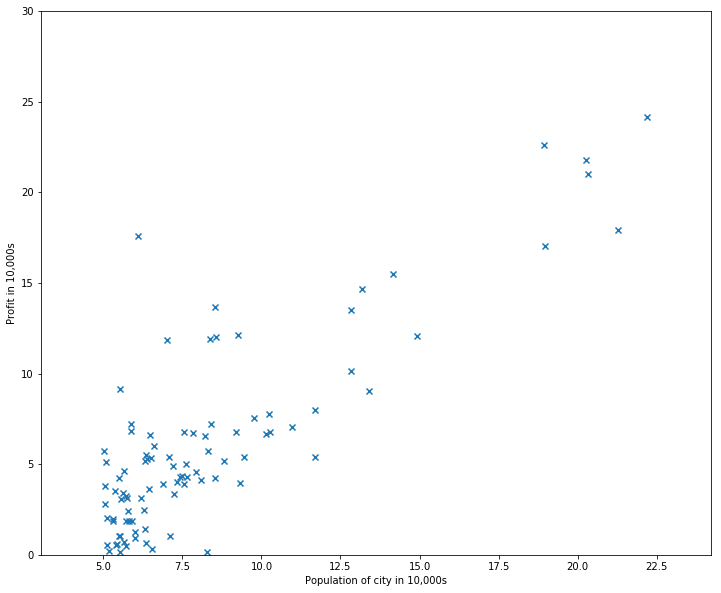

In [4]:
# Let us plot the data
import matplotlib.pyplot as plt
fig = figure()

ax = plt.gca()
ax.scatter( data[0],data[1],marker='x')
ax.set_ylim(0,30)
ax.set_xlim( [data[0].min()-2,data[0].max()+2])
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in 10,000s')
fig.set_size_inches(12,10)

<h3><font color='blue'>=================================================</font></h3>
<h3><font color='olive'>
Now lets examine the pandas operations to create the two structures we need to solve our regression problem
</font></h3>
<h3><font color='blue'>=================================================</font></h3>

In [5]:
# apd - a panda dataframe is a dataframe of shape 3 x 2 and npd is a dataframe of shape 2 x 4
apd = pd.DataFrame( {0:[1,2,3],1:[4,5,6]});print ('apd is \n', apd)
npd = pd.DataFrame({0:[1,3],1:[3,4],2:[1,2],3:[4,5]});print( 'npd is \n',npd)
# since no of columns of first data frame equal to no of rows of second dataframe we can multiply the two matrices
print( 'apd.dot(npd) is\n', apd.dot(npd))
# pandas are essentially named wrappers around numpy arrays - lets create a numpy array of two rows and check
# the dot product of a panda dataframe and a numpy array
nparr = np.array( [[1,3,1,4,6,7,9,10],[3,4,2,5,7,3,4,6]]); print(nparr);print(nparr.shape)
print( 'apd.shape is ',apd.shape)
print( 'npd.shape is ' ,npd.shape)
print( 'apd.dot(nparr) is \n',apd.dot(nparr))

apd is 
    0  1
0  1  4
1  2  5
2  3  6
npd is 
    0  1  2  3
0  1  3  1  4
1  3  4  2  5
apd.dot(npd) is
     0   1   2   3
0  13  19   9  24
1  17  26  12  33
2  21  33  15  42
[[ 1  3  1  4  6  7  9 10]
 [ 3  4  2  5  7  3  4  6]]
(2, 8)
apd.shape is  (3, 2)
npd.shape is  (2, 4)
apd.dot(nparr) is 
     0   1   2   3   4   5   6   7
0  13  19   9  24  34  19  25  34
1  17  26  12  33  47  29  38  50
2  21  33  15  42  60  39  51  66


In [6]:
# Lets subtract a column of one dataframe from the column of another
print( apd)
spd = pd.DataFrame([[1,3],[2,6],[3,4]])
print( spd )
print( apd[0] - spd[1] )
print( apd.dot(np.zeros(2)))

   0  1
0  1  4
1  2  5
2  3  6
   0  1
0  1  3
1  2  6
2  3  4
0   -2
1   -4
2   -1
dtype: int64
0    0.0
1    0.0
2    0.0
dtype: float64


In [7]:
# Lets see how we will prepare the design matrix X - use pandas concat
# to concatenate a column of ones equal to number of examples and the first column of our data
# dataconcat = pd.concat( [ pd.DataFrame( np.ones( len( data ) ) ),  pd.DataFrame( data[0] ) ] , axis=1 )
# print dataconcat
# type(data[0])
X = pd.DataFrame({0:np.ones(len(data)),1:data[0]})
y = data[1]
np.array(data[1]).shape
print(X.shape)
print(y.shape)

(97, 2)
(97,)


<h3><font color='blue'>=================================================</font></h3>

#### Lets recap
#### our hypothesis
$h_\theta(x) = \theta_0 + \theta_1 x$
#### The cost function
$J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2$
####  The gradient descent equations :
$\begin{align*} \text{repeat until convergence: } \lbrace & \\ \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \\ \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}\right) \\ \rbrace&\end{align*}$

<h3><font color='blue'>=================================================</font></h3>

In [8]:
# Lets create the array of parameters that we need to learn to create our linear regression model
theta = np.zeros( data.shape[1] )
print('shape of X ', X.shape , ' and that of theta ',
      theta.shape, ' and of data ', data.shape, ' and of y ', y.shape)
# X is 97 x 2  theta is  2, X.dot(theta)  will result in a shape of (97,)
# y = data[1] is 97 x 1 written in numpy style as (97,) so we should have obtained the core
# part of our left hand side component
print ( (X.dot(theta) - data[1] )[:5])
# and Lets now check the cost formula applied - 
(1/(2.0 * len(X) ) ) * sum( ( X.dot(theta) - y ) ** 2 )

shape of X  (97, 2)  and that of theta  (2,)  and of data  (97, 2)  and of y  (97,)
0   -17.5920
1    -9.1302
2   -13.6620
3   -11.8540
4    -6.8233
dtype: float64


32.072733877455654

In [9]:
# Lets create a procedure for calculatig the cost
def computeCost(X,y,theta):
    return ( 1/ ( 2.0 * len(X) ) ) *  sum (  ( X.dot(theta) - y ) ** 2 ) 

In [10]:
# Lets verify that we are computing the same cost
computeCost(X,y,theta)


32.072733877455654

In [11]:
# Lets now see how we can compute a gradient descent step
# X is 97 X 2  dot theta - 2 X 1 is 97 x 1 - y - 97 x 1  - transpose to 1 x 97 dot X - 97 x 2 
# will give us an array of 1 x 2 - transposed will give us the array of thetas - 2 x 1
(  ( ( X.dot(theta) -y ).transpose() ).dot(X) ).transpose()

0    -566.396100
1   -6336.898425
dtype: float64

In [12]:
# Lets code gradient descent - 
def gradientDescent(X,y,theta,numIters,alpha):
    # we have m = 97 examples
    m = len(X)
    # we record the cost for each of the iterations that we run
    jhist = np.zeros( (numIters,1) )
    # for the number of iterations - we calculate each of the thetas - through matrice operations
    for n in range(numIters):
#         print 'calc\n', alpha * ( 1.0 / m ) * (  ( ( X.dot(theta) -y ).transpose() ).dot(X) ).transpose()
        theta = theta - alpha * ( 1.0 / m ) * (  
            ( ( X.dot(theta) -y ).transpose() ).dot(X) ).transpose()
#         print 'theta\n', theta
        # record the history in jhistory
        jhist[n] = computeCost(X,y,theta)
    return theta, jhist

In [13]:
# Lets get theta and jhist
theta, jhist = gradientDescent(X,y,theta,4000,0.01)

In [14]:
# and check the theta values
print (theta)

0   -3.892863
1    1.192740
dtype: float64


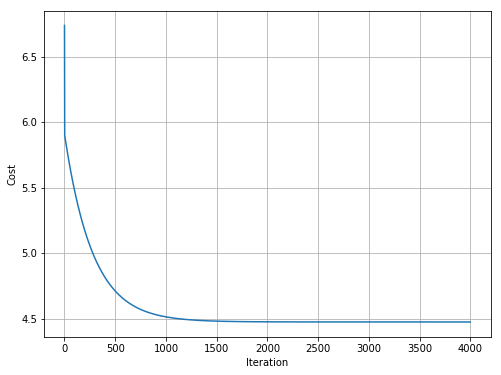

In [15]:
# Lets plot the gradient descent
fig = figure()
plt.plot(range(4000),jhist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
fig.set_size_inches(8,6)
plt.grid('on')

In [16]:
jhist[:5]

array([[ 6.73719046],
       [ 5.93159357],
       [ 5.90115471],
       [ 5.89522859],
       [ 5.89009494]])

In [17]:
# Making predictions
print ('Profit predicted for a population of 35000 is ', np.array([1,3.5]).dot(theta) * 10000)

Profit predicted for a population of 35000 is  2817.29097686


In [18]:
(-3.8928 + 1.19274 * 3.5 ) * 10000

2817.8999999999955

In [19]:
# Lets  create data to plot the cost for different 
# combinations of theta1 and theta2 to appreciate
# how gradient descent works
from mpl_toolkits.mplot3d import Axes3D

th1vals = np.linspace(-10,10,100)
th2vals = np.linspace(-1,4,100)
jvals = np.zeros ( ( len(th1vals), len(th2vals) ) )
for i in range(len(th1vals)):
    for j in range( len( th2vals)):
        jvals[i,j] = computeCost(X, y, np.array([ th1vals[i],th2vals[j]]))

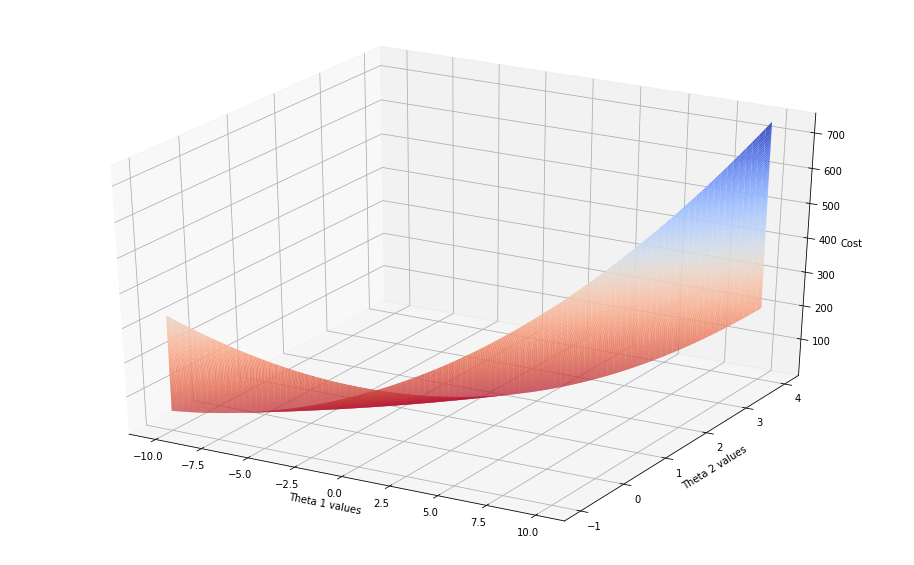

In [20]:
# A 3 D surface plot showing the global minimum at the floor
fig = figure()
ax = fig.add_subplot( 111, projection='3d')
ax.plot_surface(th1vals, th2vals, jvals, rstride=1, cstride=1, cmap = cm.coolwarm_r, linewidth=0)
ax.set_xlabel('Theta 1 values')
ax.set_ylabel('Theta 2 values')
ax.set_zlabel('Cost')
fig.set_size_inches(16,10)


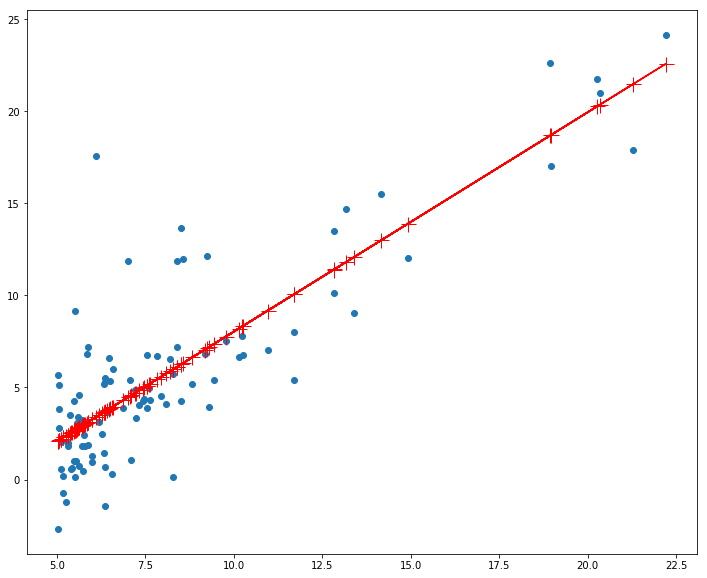

In [21]:
# Lets plot the actual and predicted values together
fig = figure()
plt.scatter(data[0],data[1])
plt.plot( data[0],X.dot(theta),marker='+',color='r',markersize=15)
fig.set_size_inches(12,10)

<h3><font color='blue'>=================================================</font></h3>
<h3><font color='olive'>
<li>To evaluate how we have fared :
<ul>
<li>We will use the most often used regression metric - $R^2$</li>
<li>Known as the coefficient of determination</li><br>
<li>It is the variation explained by the model</li><br>
<li>It is equal to 1 less the sum of differences of squares of preidictions from actual values 
divided by the sum of the squares of the y values from mean of y values</li><br>
<li>The remaining part is the variation the model cannot account for<br>
the sum of residual squares</li>
</ul>
</font></h3>
<h3><font color='blue'>=================================================</font></h3>

In [22]:
predictSquareDiffs = sum ( ( X.dot(theta)- y ) ** 2 )
print ('Squares of differences between  predictions and actuals %.2f' % ( predictSquareDiffs ))
meanSquareDiffs = sum( ( y - np.mean(y)) ** 2 )
print ('Square of y values from mean of y values %.2f' % meanSquareDiffs)
print ('The coefficient of determination is %.3f' %  ( 1 - ( predictSquareDiffs/meanSquareDiffs ) ))

Squares of differences between  predictions and actuals 868.53
Square of y values from mean of y values 2914.85
The coefficient of determination is 0.702


<h3><font color='blue'>=================================================</font></h3>
<h3><font color='olive'>
<ul>
<li>All Machine Learning algorithms are provided by pre built libraries in almost all languages</li>
<li>Lets explore how to do what we did so far in scikit-learn</li>
<li>We will use LinearRegression from the linear_model module</li>
<li>All across the pattern is to select the algorithm class, fit it to data, predict, compare to actuals</li>
</ul>
</font></h3>
<h3><font color='blue'>=================================================</font></h3>

In [23]:
# Import linear_model
from sklearn import linear_model
# Initialize the model
lin_model = linear_model.LinearRegression()
# We do not need the column of 1s as that is taken care of by the library
Xflm = data[0].values.reshape(data.shape[0],1)
# Obtain the model fitted to the data
clf = lin_model.fit(Xflm,y)

In [24]:
# The first feature in our data is the intercept 
# In the model obtained its coefficient will correspond to the intercept_ attribute
print (clf.intercept_)
# The coefficients of the subsequent features will be given by the coef_ attribute
print (clf.coef_)
# The score will give us the coefficient of determination
print (clf.score(Xflm,y))

-3.89578087831
[ 1.19303364]
0.702031553784


In [25]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(n_iter=2000,random_state=1)
clf_sgd = sgd_model.fit(Xflm,y)

print(clf_sgd.intercept_)
print(clf_sgd.coef_)
print(clf_sgd.score(Xflm,y))

[-3.91422304]
[ 1.173289]
0.700766392863


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


<h3><font color='blue'>=================================================</font></h3>
<h3><font color='olive'>
Now lets check out linear regression for multiple variables/features<br><br>
The file houseprice2var.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house <br>
</font></h3>
<h3><font color='blue'>=================================================</font></h3>

In [26]:
# Lets load and see the data
data2 =  pd.read_csv('houseprice2var.txt',header=None)
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [27]:
# Lets prepare the features and the result matrices - we have our features matrix of size 47 X 2 and 
# result matrix of size 47 X 1
X2 = data2.ix[:,[0,1]]; print (X2[:5])
y2 = data2.ix[:,2];print (y2[:5])
m2 = len(y2); print (m2)

      0  1
0  2104  3
1  1600  3
2  2400  3
3  1416  2
4  3000  4
0    399900
1    329900
2    369000
3    232000
4    539900
Name: 2, dtype: int64
47


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [29]:
# we need to have features simlarly scaled in range as large differentials 
# between some features will lead to distortion in calculation of learning parameters
# Lets check out the code before creating the procedure
print (np.mean(X2))
print (np.std(X2))
(( X2 - np.mean(X2)  ) / np.std(X2))[:5]

0    2000.680851
1       3.170213
dtype: float64
0    786.202619
1      0.752843
dtype: float64


,0,1
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [30]:
# Les now wrap the code in a method
def featureNormalize(X):
    return  ( X -np.mean(X) ) / np.std(X), np.mean(X), np.std(X)

In [31]:
X2.shape

(47, 2)

In [32]:
# Use the method to get our normalized feature matrix and the mean and the standard deviation of the columns
X2Norm, mu, sigma = featureNormalize(X2)

In [33]:
# Lets check the normalized matrix and append a column of ones to get a feature matrix of size 47 X 3
print (len( X2Norm ), X2Norm.shape)
print ( np.mean(X2Norm))
print( np.std(X2Norm))
X2F = pd.concat( [ pd.DataFrame( np.ones( len(X2)) ), X2Norm ] ,axis = 1 )

47 (47, 2)
0   -9.448707e-18
1    2.480285e-16
dtype: float64
0    1.0
1    1.0
dtype: float64


In [34]:
# Lets use our gradient descent method to get the theta parameters array and cost history
theta2, jhist2 = gradientDescent( X2F, y2, np.zeros(X2F.shape[1]),3000,0.01)

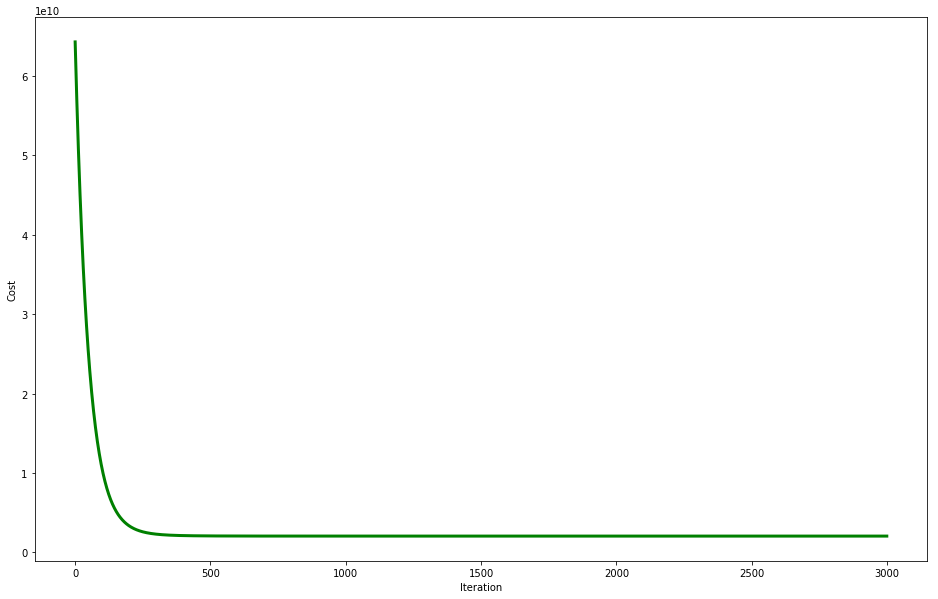

In [35]:
# Lets plot the gradient descent
fig = figure()
plt.plot( range(len(jhist2)),jhist2, color = 'g', lw=3)
plt.xlabel('Iteration')
plt.ylabel('Cost')
fig.set_size_inches(16,10)

In [36]:
# make a prediction
print ( 'The predicted price for a 2200 sq feet 4 BR flat is %6.2f' % ( 
    np.array([1,(2200 - mu[0] )/sigma[0], (4 - mu[1])/sigma[1]]).dot(theta2) ))

The predicted price for a 2200 sq feet 4 BR flat is 360909.40


In [37]:
theta2

0    340412.659574
0    109447.692295
1     -6578.250680
dtype: float64

In [38]:
# Lets prepare data to get calculations through the normal equation and check the predicted cost
data3 = pd.read_csv('houseprice2var.txt',header=None)
# prepend a column of 1s -> X - 47 x 3 - y3 - 47 x 1
X3 = pd.concat( [ pd.DataFrame( np.ones( len(data3) ) ), data3.ix[:,[0,1] ] ] , axis = 1 )
y3 = data3[2]
X3
theta3 = np.zeros( X3.shape[1]) # 3 x 1
# X3 - 47 x 3 - transpose 3 x 47 dot X3 47 x 3 - we get 3 x 3  - inverse also 3 x 3
# X3 -transpose 3 x 47 dot y3 - 47 x 1 - we get 3 x 1
# 3 x 3 X 3 x 1 - we get thetas of size 3 x 1
theta3 = ( np.linalg.inv( X3.transpose().dot(X3)) ).dot( X3.transpose().dot(y3))
print(theta3)
print ('%.2f' % np.array([1,2200,4]).dot(theta3))

[ 89597.9095428     139.21067402  -8738.01911233]
360909.32


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [39]:
# Now we use the scikit learn LinearRegression() algorithm
lin_model_mv = linear_model.LinearRegression()
# we do not need the prependec columns of 1
Xflmv = data2.ix[:,:1]
print('Shape of Xflmv ',Xflmv.shape)
clf_mv = lin_model_mv.fit(Xflmv,y3)
# We can verify the coefficients are same as found through normal equation
print('intercept ', clf_mv.intercept_)
print('coefficients ',clf_mv.coef_)
print('Score of clf_mv ', clf_mv.score(Xflmv,y3))
# Let us verify the coefficient of determination
clf_mv_predictions = clf_mv.predict(Xflmv)
clf_mv_predictions_ly3 = clf_mv_predictions - y3
y3diffs = y3 - np.mean(y3)
print(1 - ( sum((clf_mv_predictions_ly3 * clf_mv_predictions_ly3))/sum((y3diffs * y3diffs))))

Shape of Xflmv  (47, 2)
intercept  89597.9095428
coefficients  [  139.21067402 -8738.01911233]
Score of clf_mv  0.732945018029
0.7329450180289141


In [40]:
# Use f_regression to get the f scores for the features to get a sense
# of their importance
from sklearn.feature_selection import f_regression
demo_freg = f_regression(Xflmv,y3,True)
demo_freg
# The first array is the F-statistic and the second the p-values for the features
# The null hypothesis is that all the features have no effect and the response variable can 
# be estimated with them being 0
# If that were true then the p-values given by the f_regression should be larger  than the significance level
# we choose to operate with
# That is if we want to operate at a 95% confidence level the values produced should be greater than 0.05
# Here we see the values are significantly less than 0.05
# Thus we reject the null hypothesis and say that some of the coefficients will not be zero
# to allow us to explian the results we have observed
# We can consider the F-statisic to be an estimator of the significance of a feature
# The lower it is more strongly significant ( 1 - the f statisit for the feature ) it is

(array([ 122.28859857,   10.94196227]),
 array([  2.02726810e-14,   1.85464254e-03]))

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
Xpoly2 = poly.fit_transform(data2.ix[:,:1])
print(Xpoly2.shape)
print(Xpoly2[:3])
lin_poly = linear_model.LinearRegression()
clf_poly = lin_poly.fit(Xpoly2,y3)
print(clf_poly.score(Xpoly2,y3))

(47, 6)
[[  1.00000000e+00   2.10400000e+03   3.00000000e+00   4.42681600e+06
    6.31200000e+03   9.00000000e+00]
 [  1.00000000e+00   1.60000000e+03   3.00000000e+00   2.56000000e+06
    4.80000000e+03   9.00000000e+00]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00   5.76000000e+06
    7.20000000e+03   9.00000000e+00]]
0.75467666158


In [42]:
# get feature names for the polynomial transformer
poly.get_feature_names(['sqft','nbrs'])

['1', 'sqft', 'nbrs', 'sqft^2', 'sqft nbrs', 'nbrs^2']

In [43]:
# See an instance of transforming the new example using the polynomial transformer 
# created earlier
nr_poly_transformed = poly.transform(np.matrix([[2200,4]]))
# make a prediction using the transformed example
clf_poly.predict(nr_poly_transformed)

array([ 352181.70169965])

### To tackle overfitting regularization is employed
### Which is toning down the magnitued of the parameters
### For linear regression with l2 normalization the Ridge algorithm is available

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridge_model = Ridge(alpha=0.01,normalize=True)
clf_ridge = ridge_model.fit(Xpoly2,y3)
print(clf_ridge.score(Xpoly2,y3))
print(clf_poly.intercept_, clf_ridge.intercept_)
print(clf_poly.coef_,'\n',clf_ridge.coef_)

0.742561922582
11855.6756785 77264.2743438
[  0.00000000e+00   6.63412900e+01   1.02028677e+05  -2.58302442e-02
   6.06308796e+01  -3.88920549e+04] 
 [  0.00000000e+00   9.93666549e+01   2.97667122e+04  -3.47164140e-03
   1.67069058e+01  -1.18187331e+04]


In [47]:
Ridge?

In [46]:
# Use joblib to dump models in serialized form to disk
from sklearn.externals import joblib
joblib.dump({'clf_mv_on_disk':clf_mv},'lin_mv_models',compress=5)

['lin_mv_models']

In [47]:
# Load back the model from disk
lin_mv_models_fm_disk = joblib.load('lin_mv_models')
[x for x in lin_mv_models_fm_disk.items()]

[('clf_mv_on_disk',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]

In [48]:
clf_mv_fm_disk = lin_mv_models_fm_disk['clf_mv_on_disk']

In [49]:
print(clf_mv_fm_disk.intercept_,clf_mv_fm_disk.coef_)

89597.9095428 [  139.21067402 -8738.01911233]


In [50]:
clf_mv_fm_disk.predict(np.array([2200, 4]).reshape(1, 2))

array([ 360909.31593226])